# Gesture recognition

デフォルト:手1

https://developers.google.com/mediapipe/solutions/vision/gesture_recognizer

In [5]:
# !wget -O ./models/gesture_recognizer.task -q https://storage.googleapis.com/mediapipe-models/gesture_recognizer/gesture_recognizer/float16/1/gesture_recognizer.task

In [2]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

import mediapipe as mp
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [3]:
model_path = './models/gesture_recognizer.task'

In [4]:
plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles


def display_one_image(image, title, subplot, titlesize=16):
    """Displays one image along with the predicted category name and score."""
    plt.subplot(*subplot)
    plt.imshow(image)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize), color='black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)


def display_batch_of_images_with_gestures_and_hand_landmarks(images, results):
    """Displays a batch of images with the gesture category and its score along with the hand landmarks."""
    # Images and labels.
    images = [image.numpy_view() for image in images]
    gestures = [top_gesture for (top_gesture, _) in results]
    multi_hand_landmarks_list = [multi_hand_landmarks for (_, multi_hand_landmarks) in results]

    # Auto-squaring: this will drop data that does not fit into square or square-ish rectangle.
    rows = int(math.sqrt(len(images)))
    cols = len(images) // rows

    # Size and spacing.
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols, 1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))

    # Display gestures and hand landmarks.
    for i, (image, gestures) in enumerate(zip(images[:rows*cols], gestures[:rows*cols])):
        title = f"{gestures.category_name} ({gestures.score:.2f})"
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols) * 40 + 3
        annotated_image = image.copy()

        for hand_landmarks in multi_hand_landmarks_list[i]:
            print(hand_landmarks)
            hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
            hand_landmarks_proto.landmark.extend([
                landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
            ])

            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks_proto,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        subplot = display_one_image(annotated_image, title, subplot, titlesize=dynamic_titlesize)

    # Layout.
    plt.tight_layout()
    plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

## Image

In [10]:
IMAGE_FILENAMES = ['./../../../../test_img/thumbs-up-4589867_1280.jpg',
                    './../../../../test_img/young-woman-teaching-sign-language.jpg']

W20240408 16:20:18.044544 3796753472 gesture_recognizer_graph.cc:128] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.
I20240408 16:20:18.045718 3796753472 hand_gesture_recognizer_graph.cc:249] Custom gesture classifier is not defined.


[NormalizedLandmark(x=0.47878068685531616, y=0.7392305135726929, z=-1.321326976722048e-07, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4381830096244812, y=0.5634981989860535, z=-0.05619398504495621, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.3718078136444092, y=0.44670000672340393, z=-0.09551379084587097, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.32543206214904785, y=0.33528122305870056, z=-0.1313900500535965, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.33036577701568604, y=0.2039465308189392, z=-0.15859508514404297, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.24385276436805725, y=0.4499276578426361, z=-0.07852251827716827, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.1929275095462799, y=0.4481566548347473, z=-0.174921452999115, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.18516814708709717, y=0.4653814733028412, z=-0.22362732887268066, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.1750246286392212, y=0.4517

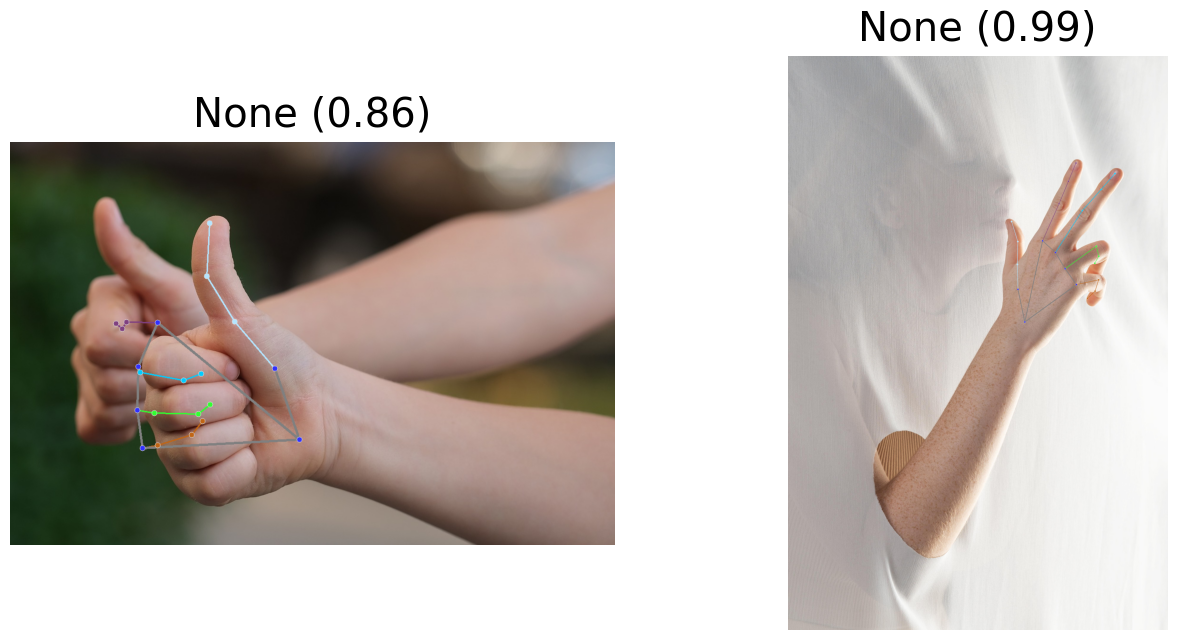

In [11]:
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.GestureRecognizerOptions(base_options=base_options)
recognizer = vision.GestureRecognizer.create_from_options(options)

images = []
results = []
for image_file_name in IMAGE_FILENAMES:
  # STEP 3: Load the input image.
  image = mp.Image.create_from_file(image_file_name)

  # STEP 4: Recognize gestures in the input image.
  recognition_result = recognizer.recognize(image)

  # STEP 5: Process the result. In this case, visualize it.
  images.append(image)
  top_gesture = recognition_result.gestures[0][0]
  hand_landmarks = recognition_result.hand_landmarks
  results.append((top_gesture, hand_landmarks))

display_batch_of_images_with_gestures_and_hand_landmarks(images, results)

## Video

In [46]:
# For Video
plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'xtick.labelbottom': False,
    'xtick.bottom': False,
    'ytick.labelleft': False,
    'ytick.left': False,
    'xtick.labeltop': False,
    'xtick.top': False,
    'ytick.labelright': False,
    'ytick.right': False
})

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

def draw_landmark(image, result):
    gesture, hand_landmarks = result
    title = f"{gesture.category_name} ({gesture.score:.2f})"
    annotated_image = image.copy()
    
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
    landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks[0]
    ])

    mp_drawing.draw_landmarks(
        annotated_image,
        hand_landmarks_proto,
        mp_hands.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())
    
    position = (10, 100)  # 左上の座標 (x, y)

    # フォントとフォントスケール、色、太さを指定する
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 4
    font_color = (255, 255, 255)  # 白色
    thickness = 5

    # 画像にテキストを追加する
    cv2.putText(annotated_image, title, position, font, font_scale, font_color, thickness)

    return annotated_image


In [47]:
import mediapipe as mp

BaseOptions = mp.tasks.BaseOptions
GestureRecognizer = mp.tasks.vision.GestureRecognizer
GestureRecognizerOptions = mp.tasks.vision.GestureRecognizerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a gesture recognizer instance with the video mode:
options = GestureRecognizerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.VIDEO)

In [48]:
# 動画読み込み
cap = cv2.VideoCapture('./../../../../test_video/5925295-uhd_3840_2160_24fps.mp4')
# fps取得
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# 空作成
output_vid = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

In [49]:
with GestureRecognizer.create_from_options(options) as recognizer:
    frame_index = 1
    while True:
        ret, frame = cap.read()
        if ret:
            numpy_frame_from_opencv = np.asarray(frame)
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=numpy_frame_from_opencv)

            frame_timestamp_ms = int(1000 * frame_index / fps)
            gesture_recognition_result = recognizer.recognize_for_video(mp_image, frame_timestamp_ms)
            
            # print(gesture_recognition_result)
            if len(gesture_recognition_result.hand_landmarks) > 0:
                top_gesture = gesture_recognition_result.gestures[0][0]
                hand_landmarks = gesture_recognition_result.hand_landmarks
                annotated_image = draw_landmark(numpy_frame_from_opencv, (top_gesture, hand_landmarks))
                output_vid.write(annotated_image)
            else:
                output_vid.write(numpy_frame_from_opencv)
            frame_index += 1
        else:
            output_vid.release()
            break

W20240408 16:38:58.469237 3796753472 gesture_recognizer_graph.cc:128] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.
I20240408 16:38:58.470618 3796753472 hand_gesture_recognizer_graph.cc:249] Custom gesture classifier is not defined.


## Camera

In [7]:
def draw_landmark_for_camera(image, result):
    gesture, hand_landmarks = result
    title = f"{gesture.category_name} ({gesture.score:.2f})"
    annotated_image = image.copy()
    
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
    landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks[0]
    ])

    mp_drawing.draw_landmarks(
        annotated_image,
        hand_landmarks_proto,
        mp_hands.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())
    
    
    position = (10, 100)  # 左上の座標 (x, y)
    # フォントとフォントスケール、色、太さを指定する
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 4
    font_color = (255, 255, 255)  # 白色
    thickness = 5

    # 画像にテキストを追加する
    annotated_image = cv2.putText(cv2.flip(annotated_image, 1), title, position, font, font_scale, font_color, thickness)

    return annotated_image

In [8]:
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.GestureRecognizerOptions(base_options=base_options,
                                          num_hands = 1)
recognizer = vision.GestureRecognizer.create_from_options(options)

W20240408 17:11:38.358810 3796753472 gesture_recognizer_graph.cc:128] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.
I20240408 17:11:38.360008 3796753472 hand_gesture_recognizer_graph.cc:249] Custom gesture classifier is not defined.


In [9]:
with vision.GestureRecognizer.create_from_options(options) as recognizer:
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if ret:
            numpy_frame_from_opencv = np.asarray(frame)
            mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=numpy_frame_from_opencv)
            recognition_result = recognizer.recognize(mp_image)
            
            if len(recognition_result.hand_landmarks) > 0:
                top_gesture = recognition_result.gestures[0][0]
                hand_landmarks = recognition_result.hand_landmarks
                annotated_image = draw_landmark_for_camera(numpy_frame_from_opencv, (top_gesture, hand_landmarks))
                cv2.imshow('camera' , annotated_image)
            else:
                cv2.imshow('camera' , cv2.flip(frame, 1))

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break
    cap.release()
    cv2.destroyAllWindows()

W20240408 17:11:38.717022 3796753472 gesture_recognizer_graph.cc:128] Hand Gesture Recognizer contains CPU only ops. Sets HandGestureRecognizerGraph acceleration to Xnnpack.
I20240408 17:11:38.718165 3796753472 hand_gesture_recognizer_graph.cc:249] Custom gesture classifier is not defined.
